# Table of contents
0. [Introduction](0-Introduction.ipynb)
1. [Variables](1-Variables.ipynb)
2. [Data structures](2-Data-Structures.ipynb)
3. [Conditional statements and loops](3-Conditional-Statements-Loops.ipynb)
4. [Some exercises](4-Some-Exercises.ipynb)
5. [Introduction to functions](5-0-Introduction-function.ipynb)
    1. [File manipulation](5-1-File-manipulation.ipynb)
6. [From 0D to 1D](6-1-From-0D-to-1D.ipynb) $\leftarrow$
    1. [Adding lateral diffusion](6-2-Adding-lateral-diffusion.ipynb)
7. [From 1D to 2D](7-From-1D-to-2D.ipynb)
8. [Playing with the model](8-Playing-with-the-model.ipynb)

## 6. From 0D to 1D!
---
Now, back to our Turing patterns!

We have seen how to model the concentration of an activator and inhibitor when they are expressed simultaneously.

This is the very beginning of Turing patterns but it is of course not enough!
The modelling that we have done was focused on time.
Because we only had one cell (so much so that we did not even mention that it was a cell), we did not look at the interaction with the neighbours and by extension, we did not look at the spatial dimension.

So in this part we will integrate the spatial dimension to our model.

### 6.1 Representing a row of cells that are behaving independently.
First thing first, before playing with diffusion, we will display a row of cells that each have the previous small model embedded within but with a different, random, starting point.

To do so, we will use a `ndarray`.
Our `ndarray` will have two dimensions.
The first dimension will be our spatial dimension, the second dimension will be the time.

To initialise an `ndarray` it is necessary to set its size. In our case, it will be the number of cells `size` and the number of time points `n`.

### Exercise 9
Using the function `np.zeros` build an array named `A` (for activator) of dimensions `size * n`

In [1]:
# importing the numpy library
import numpy as np

# importing the useful functions
try:
    from centuri_course.utils import (
        get_random_table,
        plot_concentration_1cell,
        plot_concentration_1D,
    )
    from centuri_course import (
        answer,
        hint,
        retrieve_compute_AI,
        answer_results,
    )
except ImportError:
    %pip install centuri_course
    from centuri_course.utils import (
        get_random_table,
        plot_concentration_1cell,
        plot_concentration_1D,
    )
    from centuri_course import (
        answer,
        hint,
        retrieve_compute_AI,
        answer_results,
    )

# and carrying over the previously declared variables
mu_a = 2.8e-4
mu_i = 5e-3
tau = 0.1
k = -0.005
size = 100
dx = dy = 2.0 / size
T = 9.0
dt = 0.001
n = int(T / dt)

In [5]:
A = np.array([0])
A = np.zeros((size, n))
print(f"A -->\n{A}\n")
print(
    f"""expected A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]\n"""
)
print(f"A.shape          --> {A.shape}")
print(f"expected A.shape --> (100, 9000)")

A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

expected A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A.shape          --> (100, 9000)
expected A.shape --> (100, 9000)


This table represents the concentration of your activator `A` at each time-point.

For example `A[0, 100]` gives you the concentration of the cell `0` at time-point `100`. It is sometimes confusing to me whether the cell is first or the gene concentration. One way to remember is to look at the `shape` of the table (which is its dimension). Here the shape is `(100, 9000)`, so the first component is the cell (since there are 100 of them).

### Exercise 10

Access the values of the 4 first time-points for the last 3 cells

In [10]:
# get a random table, but always the same oO
# It helps making sure that you are actually
# slincing in the correct position in the array
out = get_random_table(100, 900)
spliced_out = out[-3:, :4]
print(f"your spliced_out -->\n{spliced_out}\n")
print(
    f"""expected spliced_out -->
[[0.39945761 0.11419206 0.1451694  0.71413739]
 [0.64262546 0.81164219 0.2139838  0.74270111]
 [0.86262341 0.36115707 0.31575497 0.39177027]]
 """
)

your spliced_out -->
[[0.39945761 0.11419206 0.1451694  0.71413739]
 [0.64262546 0.81164219 0.2139838  0.74270111]
 [0.86262341 0.36115707 0.31575497 0.39177027]]

expected spliced_out -->
[[0.39945761 0.11419206 0.1451694  0.71413739]
 [0.64262546 0.81164219 0.2139838  0.74270111]
 [0.86262341 0.36115707 0.31575497 0.39177027]]
 


Now that you can access some places in your table, it is good to know that you can also modify the values that you are accessing.

For example we saw previously that you can add values to an array, well you can do so too for splices of an array:

In [14]:
A = np.zeros((size, n))
print(f"A -->\n{A}\n")
print(f"A[:5, :5] -->\n{A[:5, :5]}\n")

# Adding 1 to the five first time points of the five first cells
B = A[:5, :5]
B += 1
print("A[:5, :5] = A[:5, :5] + 1\n")
print(f"A[:6, :6] -->\n{A[:6, :6]}\n")

A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A[:5, :5] -->
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

A[:5, :5] = A[:5, :5] + 1

A[:6, :6] -->
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]



You can also use the `+=`, `*=`, `/=`, ... operators:

In [15]:
A = np.zeros((size, n))
print(f"A[:5, :5] -->\n{A[:5, :5]}\n")

# Adding 1 to the five first time points of the five first cells
A[:5, :5] += 1

print(f"A[:6, :6] -->\n{A[:6, :6]}\n")

A[:5, :5] -->
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

A[:6, :6] -->
[[1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]



Not only you can add values but you can also assign the values of another array (which is, if you think about it, what we actually already did with the line `A[:5, :5] = A[:5, :5] + 1`):

In [23]:
A = np.zeros((size, n))
print(f"A -->\n{A}\n")

# Changing the values to values from 0 to 24
tmp = np.arange(5 * 5).reshape(5, 5)
# print(tmp)
A[:5, :5] = tmp
print("A[:5, :5] = np.arange(5*5).reshape(5, 5)\n")
print(f"A[:6, :6] -->\n{A[:7, :7]}\n")

A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A[:5, :5] = np.arange(5*5).reshape(5, 5)

A[:6, :6] -->
[[ 0.  1.  2.  3.  4.  0.  0.]
 [ 5.  6.  7.  8.  9.  0.  0.]
 [10. 11. 12. 13. 14.  0.  0.]
 [15. 16. 17. 18. 19.  0.  0.]
 [20. 21. 22. 23. 24.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]



**_Important here:_**

**_The shape of the array you are modifying must match the shape of the array you are modifying it with:_**

In [24]:
A = np.zeros((size, n))
try:
    A[:5, :5] = np.ones((5, 4))
except Exception as e:
    print("The previous line did not work!")
    print("Here is the error output:")
    print(f"\t{e}")

The previous line did not work!
Here is the error output:
	could not broadcast input array from shape (5,4) into shape (5,5)


Now, we know a little bit better how to manipulate arrays, we want to initialise the values of the cells at the first time-point at "random" (note that there is no real random with computers).

To do so we can use the function `random` from `np.random`. The function takes as an input the size of the table to create for example:

In [26]:
np.random.random((4, 4))
?np.random.random
np.random.random((4, 4))

array([[0.44088815, 0.2004808 , 0.6827069 , 0.82856309],
       [0.68655476, 0.14562663, 0.76667869, 0.06222087],
       [0.34157644, 0.35535889, 0.53754194, 0.91972692],
       [0.56710232, 0.31742526, 0.99780975, 0.07567632]])

Docstring:
random(size=None)

Return random floats in the half-open interval [0.0, 1.0). Alias for
`random_sample` to ease forward-porting to the new random API.
Type:      builtin_function_or_method

creates a `4*4` array filled with uniformly distributed random numbers between 0 and 1.

> **_To go further_**
>
> For reasons that we will not expose here, it can be mathematically proven that any known random distribution can be simulated using a uniform distribution in [0, 1), (`)` means the 1 is excluded).

### Exercise 11
Now, we want to fill the values, at the first time point, for all the cells with random floating numbers between 0 and 1.
> Notice the line `np.random.seed(0)`, it allows to control the "randomness" of the generation so you can compare your result to what should be expected

In [35]:
A = np.zeros((size, n))
np.random.seed(0)  # Note the seeding here, changing the value will create different results
# Do your thing bellow

A[:, -1] = np.random.random(size)

# Checking the results at random positions
rand_pos = np.round(np.random.random() * 100).astype(int)
print(f"A[rand_pos, 0]           --> {A[rand_pos, 0]}")
print(f"Expected A[rand_pos, 0]  --> {0.8379449074988039}")
rand_pos = np.round(np.random.random() * 100).astype(int)
print(f"A[rand_pos, 0]           --> {A[rand_pos, 0]}")
print(f"Expected A[rand_pos, 0]  --> {0.9446689170495839}")

print(f"All other values are 0s? --> {np.all(A[:, 1:]==0)} (should be True)")

A[rand_pos, 0]           --> 0.8379449074988039
Expected A[rand_pos, 0]  --> 0.8379449074988039
A[rand_pos, 0]           --> 0.9446689170495839
Expected A[rand_pos, 0]  --> 0.9446689170495839
All other values are 0s? --> True (should be True)


> **_Side note_**
>
> In the previous examples we used `np.random.random` or `np.random.seed`.
> When using several functions from a sub library (as it is the case here, `random` is a sub library of numpy), one can import it directly like so for example:
> ```python
> import numpy.random
> ```
> or that way (which is equivalent):
> ```python
> from numpy import random
> ```

Now we have initialised our array for the activator with random values at the first time-point. Remains to fill the other time-points but to do so, one has to first initialise the inhibitor array.

### Exercise 12
Initialise the inhibitor array `I` as you did for the activator array (we will fixe our seed to 1 this time to have different values)

In [36]:
I = np.zeros((size, n))
np.random.seed(1)  # again, the seed here to ensure the results
# Do your stuff below
I[:, 0] = np.random.random(size)
rand_pos = np.round(np.random.random() * 100).astype(int)
print(f"I[rand_pos, 0]           --> {I[rand_pos, 0]}")
print(f"Expected A[rand_pos, 0]  --> {0.5331652849730171}")
rand_pos = np.round(np.random.random() * 100).astype(int)
print(f"I[rand_pos, 0]           --> {I[rand_pos, 0]}")
print(f"Expected I[rand_pos, 0]  --> {0.2655466593722262}")

print(f"All other values are 0s? --> {np.all(I[:, 1:]==0)} (should be True)")

I[rand_pos, 0]           --> 0.5331652849730171
Expected A[rand_pos, 0]  --> 0.5331652849730171
I[rand_pos, 0]           --> 0.2655466593722262
Expected I[rand_pos, 0]  --> 0.2655466593722262
All other values are 0s? --> True (should be True)


Now we have our row of cells for the inhibitor and activator, we have initialised the first time-point for each of the cells, and left is to fill the values for the remaining time-points.

To do so we can use the function `compute_AI` that we defined earlier:
<details>
    <summary><b>Click here to show the answer to question 6</b></summary>
    
    
```python
def compute_AI(a, i, dt, k, tau, n):
    A, I = [a], [i]
    for t in range(n-1): # the -1 is because the first value
                         # is already in the array
        new_A = A[-1] + da(A[-1], I[-1], dt, k)
        new_I = I[-1] + di(I[-1], A[-1], dt, tau)
        I.append(new_I)
        A.append(new_A)
    return A, I
```
    
</details>

To recover this function you can run the following code:
```python
compute_AI = retrieve_compute_AI()
```

As a reminder, the function `compute_AI` takes as an input the parameters of the model (`dt`, `k`, `tau` and `n`) together with initial values of activator and inhibitor concentrations and returns a list of the evolution of all the `n` values over time.

### Exercise 13
Write a `for` loop that fills all the array cells using the function `compute_AI`

In [39]:
compute_AI = retrieve_compute_AI()
A = np.zeros((size, n))
I = np.zeros((size, n))
np.random.seed(0)
A[:, 0] = np.random.random(100)
np.random.seed(1)
I[:, 0] = np.random.random(100)

# Do it here
for c in range(size):
    a = A[c, 0]
    i = I[c, 0]
    A_c, I_c = compute_AI(a, i, dt, k, tau, n)
    A[c, :] = A_c
    I[c, :] = I_c

You can check your results by comparing the tables you obtained with the table you get with the function `answer_results`.

To compare two tables you can use the `==` sign or the function `np.allclose` for example.

In [40]:
A_ans, I_ans = answer_results(13, A=A, I=I, dt=dt, k=k, tau=tau, n=n)

if np.alltrue(A_ans == A) and np.alltrue(I_ans == I):
    print("My results are the same as what is expected")
elif np.allclose(A_ans, A) and np.allclose(I_ans, I):
    print("My results are all close to what is expected")
else:
    print("My results are different to what was expected")

My results are the same as what is expected


Now, the concentration over time of the activator or the inhibitor of each cell are in the arrays `A` and `I`.
You can plot these values for each cell using the previously shown function `plot_concentration_1cell`. Here is an example for the 50$^{th}$ and 3$^{rd}$ cells:

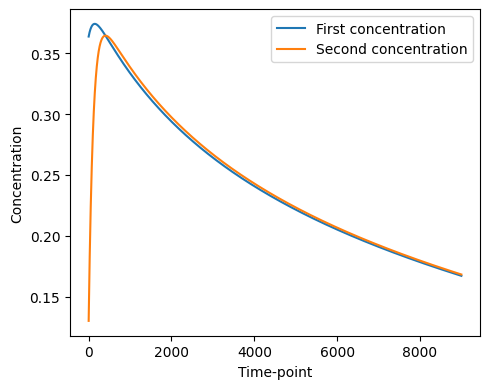

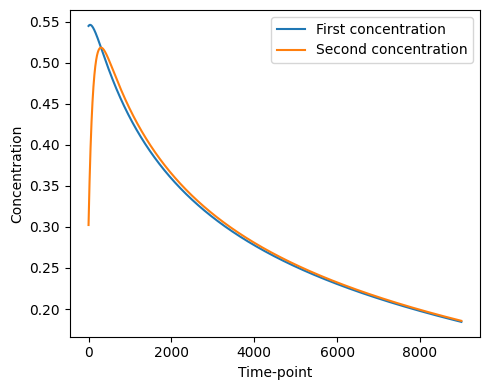

In [41]:
plot_concentration_1cell(A[49], I[49])
plot_concentration_1cell(A[3], I[3])

Using the previous plots to visualise all the cells at the same time is not really convenient.

One problem is that on a screen we are mostly bounded to two dimensions.
In the previous plot we use one dimension for the time and the other one for the level of concentration so we don't have any remaining dimension for space (our cells).

One way around that is to use colours for the level of concentration so we have space and time as our dimensions.

This is what is done in the function `plot_concentration_1D`:

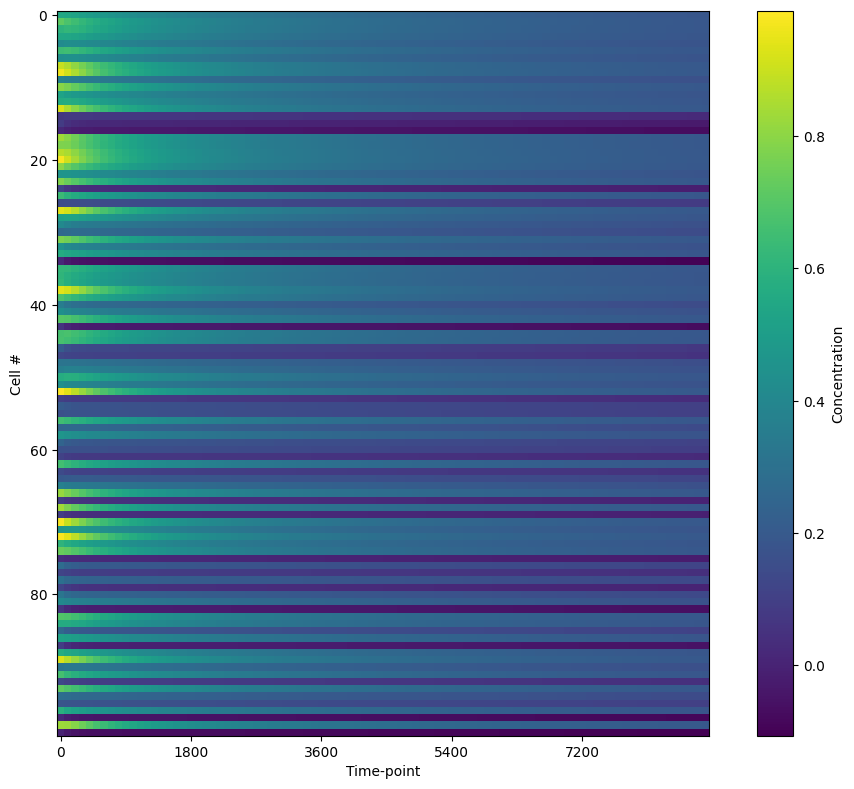

In [46]:
# plot_concentration_1D(A, I, step=100)
plot_concentration_1D(A, step=100)

Now we can have a look at the result with the oscillatory parameters found earlier:

In [47]:
A = np.zeros((size, n))
I = np.zeros((size, n))
np.random.seed(0)
A[:, 0] = np.random.random(100)
np.random.seed(1)
I[:, 0] = np.random.random(100)
A_osci, I_osci = answer_results(13, A=A, I=I, dt=0.01, k=0.05, tau=2, n=n)

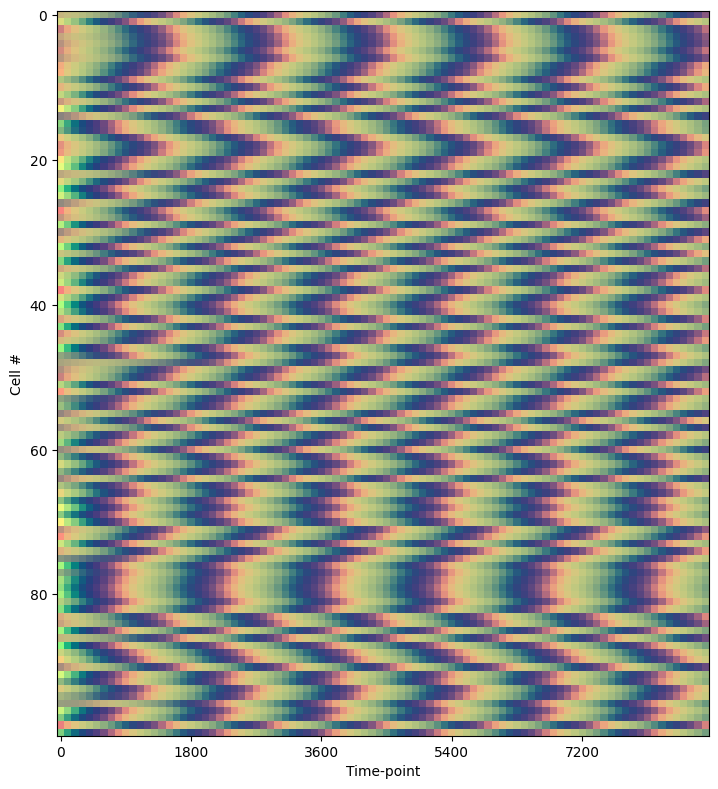

In [48]:
plot_concentration_1D(A_osci, I_osci, step=100)